Hotel reviwes

##### importowanie potrzebnych bibliotek

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

##### Działamy na datasecie recenzji hoteli, w którym mamy 2 tabele. Pierwsza ‘Review’  posiada dane tekstowe, druga  ‘Rating’ ma dane liczbowe odpowiedzialne za ocene pobytu.

In [ ]:
kaggle datasets download -d andrewmvd/trip-advisor-hotel-reviews

# Importowanie danych:

##### Ten kod wczytuje dane z pliku CSV do ramki danych za pomocą biblioteki Pandas i następnie wyświetla kilka pierwszych wierszy tej ramki danych.

In [3]:
import pandas as pd

# Wczytaj dane z pliku CSV
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Wyświetl kilka pierwszych wierszy ramki danych
print(df.head())


                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


##### W tym przypadku tak samo jak wyżej wczytuje dane z pliku CSV, a następnie wyświetla nazwy kolumn

In [4]:
import pandas as pd

# Load the data
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Check the column names
print(df.columns)

Index(['Review', 'Rating'], dtype='object')


## Eksploracyjna analiza danych

##### Kod wykonuje dwie operacje czyszczenia danych w kolumnie 'Review' ramki danych: usuwanie tagów HTML <br /> oraz usunięcie początkowych i końcowych białych znaków. Następnie wypisuje nazwy kolumn, aby użytkownik mógł sprawdzić wynikowe zmiany w danych.

In [6]:
# Czysczenie dancyh - usunięcie tagu HTML'owego <br />
df['Review'] = df['Review'].str.replace('<br />', '')
# Czyszczenie danych
df['Review'] = df['Review'].str.strip() 
#usunięcie początkowych i końcowych znaków białych

# Check the column names
print(df.columns)

Index(['Review', 'Rating'], dtype='object')


##### Sprawdza wartości po wyczyszczeniu danych

In [7]:
# Wyświetlenie pierwszych wartości po wyczyszczeniu danych
df['Review'].head()

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience hotel monaco seat...
3    unique, great stay, wonderful time hotel monac...
4    great stay great stay, went seahawk game aweso...
Name: Review, dtype: object

### Podział danych:
Tutaj sprawdzam jak są podzielone dane w datasecie:




In [8]:
# Sprawdzanie danych
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


 Dzięki temu widać kolumne Rating

In [9]:
# Wypisanie najczęściej występującej wartości w kolumnie reviews:
top = df.mode().iloc[0]
print(top)

Review    1 best hotels new york, hotel absoutly brillia...
Rating                                                  5.0
Name: 0, dtype: object


##### Tutaj analizujemy kolumne Rating. Pierwsza linia pokazuje, ile razy występują różne oceny w tej kolumnie, a druga linia przypisuje kolumnę Rating do zmiennej i wyświetla jej zawartość.

In [10]:
#Sprawdzam Rating
df['Rating'].value_counts()
#Zmienna z etykietami sentymentu
Rating = df['Rating']

print(Rating)

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64


### Histogram długości recenzji w zależności od oceny:

##### Podział recenzji naa pozytywne i negatywne

##### Tworzymy kolumnę Sentiment na podstawie ocen, dzieli dane na pozytywne i negatywne opinie, a następnie tworzy i wyświetla wykres przedstawiający podział opinii na pozytywne i negatywne.

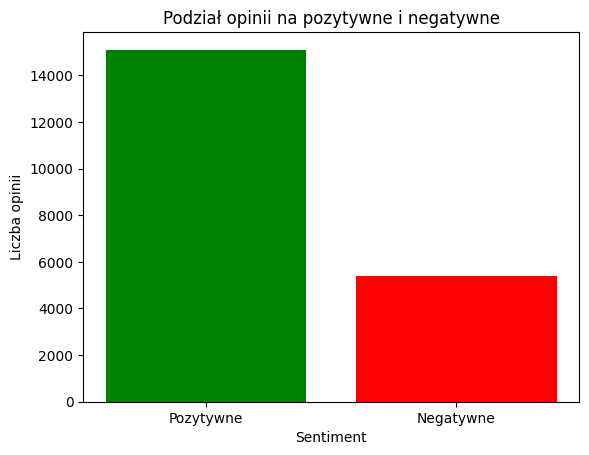

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Wczytanie danych z pliku CSV
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Tworzenie kolumny z kategorią "Sentiment" na podstawie ocen
df['Sentiment'] = df['Rating'].apply(lambda x: 'Pozytywna' if x >= 4 else 'Negatywna')

# Podział danych na pozytywne i negatywne opinie
pozytywne_opinie = df[df['Sentiment'] == 'Pozytywna']
negatywne_opinie = df[df['Sentiment'] == 'Negatywna']

# Tworzenie wykresu
plt.bar(['Pozytywne', 'Negatywne'], [len(pozytywne_opinie), len(negatywne_opinie)], color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Liczba opinii')
plt.title('Podział opinii na pozytywne i negatywne')
plt.show()


## Porównanie recenzji z zależności od długości

##### Ten kod analizuje długość recenzji w ramce danych, tworzy histogramy dla recenzji pozytywnych i negatywnych, a następnie oblicza statystyki dotyczące długości recenzji w obu kategoriach.

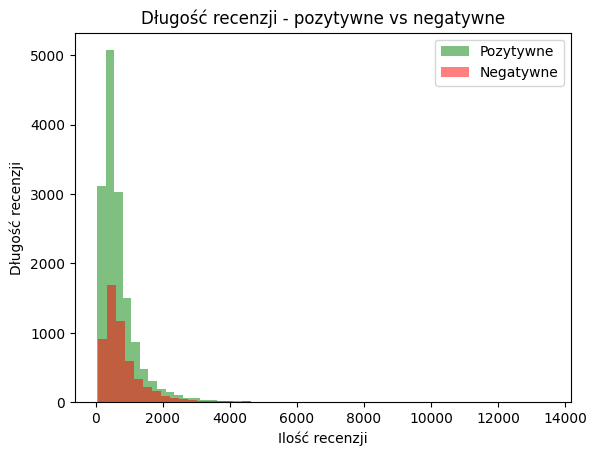

Średnia długość recenzji pozytywnych: 695.1638507917578
Minimalna długość recenzji pozytywnych: 44
Maksymalna długość recenzji pozytywnych: 12738
Średnia długość recenzji negatywnych: 808.0313078918118
Minimalna długość recenzji negatywnych: 47
Maksymalna długość recenzji negatywnych: 13501


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Wczytanie danych z pliku CSV
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Tworzenie kolumny z kategorią "Sentiment" na podstawie ocen
df['Sentiment'] = df['Rating'].apply(lambda x: 'Pozytywna' if x >= 4 else 'Negatywna')

# Filtruj dane dla recenzji pozytywnych
positive_reviews = df[df['Sentiment'] == 'Pozytywna']
# Oblicz długość recenzji pozytywnych
positive_review_lengths = positive_reviews['Review'].apply(len)

# Filtruj dane dla recenzji negatywnych
negative_reviews = df[df['Sentiment'] == 'Negatywna']
# Oblicz długość recenzji negatywnych
negative_review_lengths = negative_reviews['Review'].apply(len)

# Utwórz histogram dla recenzji pozytywnych
plt.hist(positive_review_lengths, bins=50, color='green', alpha=0.5, label='Pozytywne')
# Utwórz histogram dla recenzji negatywnych
plt.hist(negative_review_lengths, bins=50, color='red', alpha=0.5, label='Negatywne')

plt.xlabel('Ilość recenzji')
plt.ylabel('Długość recenzji')
plt.title('Długość recenzji - pozytywne vs negatywne')
plt.legend()
plt.show()

# Oblicz średnią długość recenzji pozytywnych
average_positive_length = positive_review_lengths.mean()
min_positive_length = positive_review_lengths.min()
max_positive_length = positive_review_lengths.max()

print(f"Średnia długość recenzji pozytywnych: {average_positive_length}")
print(f"Minimalna długość recenzji pozytywnych: {min_positive_length}")
print(f"Maksymalna długość recenzji pozytywnych: {max_positive_length}")

# Oblicz średnią długość recenzji negatywnych
average_negative_length = negative_review_lengths.mean()
min_negative_length = negative_review_lengths.min()
max_negative_length = negative_review_lengths.max()

print(f"Średnia długość recenzji negatywnych: {average_negative_length}")
print(f"Minimalna długość recenzji negatywnych: {min_negative_length}")
print(f"Maksymalna długość recenzji negatywnych: {max_negative_length}")


## Rozdzielenie recenzji na pojedyńcze słowa 

##### tworzenie wykresu, ktory pokazuje najczęściej występujące słowa 

##### W tym przypadku kod wykonuje operacje przetwarzania tekstu, takie jak usuwanie znaków interpunkcyjnych, zamiana na małe litery, tokenizacja (podział recenzji na słowa) oraz usunięcie stopwords z recenzji

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

# Usuń znaki interpunkcyjne
translator = str.maketrans('', '', string.punctuation)
words = df['Review'].str.translate(translator)

# Zamień na małe litery
words = words.str.lower()

# Tokenizacja - podział recenzji na słoawa
words = words.apply(word_tokenize)

# Usuń słowa z listy stopwords (np. "a", "and", "the")
stop_words = set(stopwords.words('english'))
words = words.apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Histogramy zależne od wystepowania słów

##### Kod analizuje częstość występowania słów w recenzjach, tworzy ramkę danych z wynikami, sortuje je i tworzy wykres słupkowy przedstawiający 20 najczęściej występujących słów w danych.

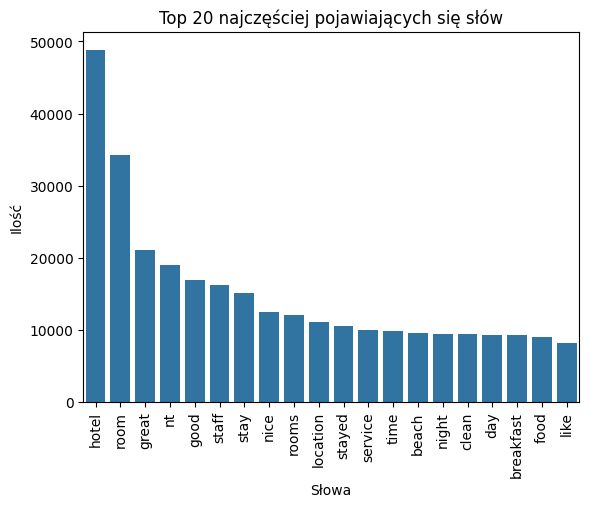

In [23]:

import seaborn as sns

# Tutaj łaczymy wszystkie słowa w pojedyńczą liste słow (moje rozumienie jest takie, że pandas tworzy liste słów dla każdej recenzji)
words_flat = [word for sublist in words for word in sublist]

# Częstość występowania słów
word_freq = nltk.FreqDist(words_flat)

# Zamieniam to w data frame
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])

# Sortuje ten dataframe
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Tworzenia grafu
sns.barplot(x=word_freq_df.index[:20], y=word_freq_df['Frequency'][:20])
plt.xticks(rotation=90)
plt.xlabel('Słowa')
plt.ylabel('Ilość')
plt.title('Top 20 najczęściej pojawiających się słów')
plt.show()


### Rozdzielenie najczęsciej występujących słow w pozytywnych i negatywnych opiniach

##### Ten kod przetwarza pozytywne i negatywne recenzje, usuwając znaki interpunkcyjne i stopwords, oblicza częstość występowania słów, tworzy ramki danych i generuje wykresy słupkowe dla 20 najczęstszych słów w obu kategoriach.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


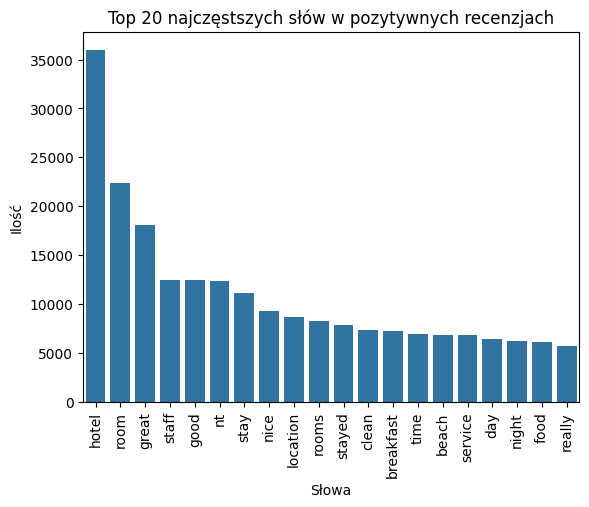

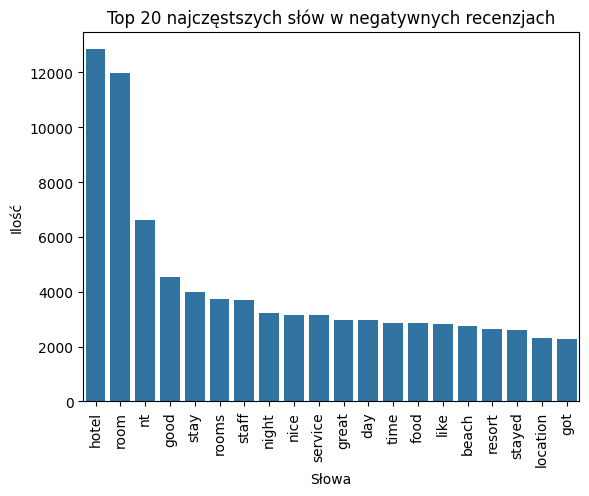

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

# Funkcja usuwająca znaki interpunkcyjne
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Tokenizacja i przetwarzanie pozytywnych recenzji
positive_words = positive_reviews['Review'].apply(remove_punctuation).str.lower().apply(word_tokenize)
positive_words = positive_words.apply(lambda x: [word for word in x if word not in stop_words])

# Tokenizacja i przetwarzanie negatywnych recenzji
negative_words = negative_reviews['Review'].apply(remove_punctuation).str.lower().apply(word_tokenize)
negative_words = negative_words.apply(lambda x: [word for word in x if word not in stop_words])

# Obliczanie częstotliwości słów dla pozytywnych recenzji
positive_word_freq = nltk.FreqDist([word for sublist in positive_words for word in sublist])

# Obliczanie częstotliwości słów dla negatywnych recenzji
negative_word_freq = nltk.FreqDist([word for sublist in negative_words for word in sublist])

# Tworzenie dataframe'ów dla częstotliwości słów pozytywnych i negatywnych
positive_word_freq_df = pd.DataFrame.from_dict(positive_word_freq, orient='index', columns=['Frequency'])
negative_word_freq_df = pd.DataFrame.from_dict(negative_word_freq, orient='index', columns=['Frequency'])

# Sortowanie dataframe'ów według częstotliwości
positive_word_freq_df = positive_word_freq_df.sort_values(by='Frequency', ascending=False)
negative_word_freq_df = negative_word_freq_df.sort_values(by='Frequency', ascending=False)

# Wykres najczęstszych słów w pozytywnych recenzjach
sns.barplot(x=positive_word_freq_df.index[:20], y=positive_word_freq_df['Frequency'][:20])
plt.xticks(rotation=90)
plt.xlabel('Słowa')
plt.ylabel('Ilość')
plt.title('Top 20 najczęstszych słów w pozytywnych recenzjach')
plt.show()

# Wykres najczęstszych słów w negatywnych recenzjach
sns.barplot(x=negative_word_freq_df.index[:20], y=negative_word_freq_df['Frequency'][:20])
plt.xticks(rotation=90)
plt.xlabel('Słowa')
plt.ylabel('Ilość')
plt.title('Top 20 najczęstszych słów w negatywnych recenzjach')
plt.show()


### Balansowanie Danych w Przetwarzaniu Języka Naturalnego

##### Ten kod przetwarza recenzje, dzieli dane na zbiory treningowy i testowy, używa TF-IDF do reprezentacji tekstu, stosuje SMOTE do oversamplingu danych treningowych, trenuje model Random Forest i wizualizuje wyniki za pomocą macierzy pomyłek.

###### Użyłam SMOTE, ponieważ dane zawierające recenzje hoteli mogą mieć różną liczbę pozytywnych i negatywnych opinii. Na przykład, może być dużo więcej pozytywnych recenzji niż negatywnych. To może być problem, gdy uczymy model komputerowy, ponieważ może bardziej skłaniać się do przewidywania, że każda recenzja jest pozytywna, ignorując negatywne. SMOTE pomógł mi zrównoważyć te dwie grupy recenzji, dodając sztuczne negatywne recenzje, aby lepiej nauczyć model, jak rozpoznawać obie kategorie opinii. To po prostu pomaga w uczciwszym przewidywaniu, zwłaszcza gdy jedna grupa recenzji jest znacznie mniej liczna niż druga.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


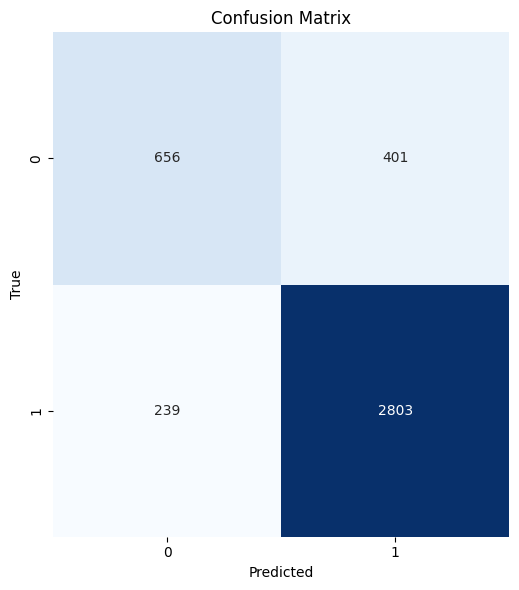

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Wczytaj dane z pliku CSV
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Pobieranie zasobów NLP
nltk.download('stopwords')
nltk.download('punkt')

X = df['Review']
y = df['Rating']

# Konwertowanie Rating na etykiety binarne
y = (y > 3).astype(int)  # Możesz dostosować próg

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Przygotowanie danych tekstowych za pomocą TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Użycie SMOTE do oversamplingu mniejszej klasy
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Trenowanie modelu
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predykcja na zestawie testowym
y_pred = model.predict(X_test_tfidf)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))

# Macierz pomyłek
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

###### 

Kod przygotowuje dane tekstowe z recenzjami z kolumny Review i ich ocenami. Następnie, na podstawie ocen, tworzymy dwuklasowy problem - pozytywne i negatywne. Dane są podzielone na zestawy treningowe i testowe, a następnie przekształcone do postaci numerycznej za pomocą TF-IDF. Zastosowałam technikę SMOTE do radzenia sobie z niezrównoważonymi klasami. Na tak przygotowanych danych jest trenowany model klasyfikatora Random Forest, a następnie dokonywane są predykcje na zestawie testowym. Wyniki są oceniane za pomocą macierzy pomyłek i raportu klasyfikacji. Wizualizacja w postaci heatmapy przedstawia wyniki macierzy pomyłek.

#### Wnioski 

Projekt prezentuje różne aspekty analizy sentymentu w kontekście recenzji hotelowych. Wykorzystują techniki przetwarzania tekstu, takie jak tokenizacja, usuwanie stopwords, analiza długości recenzji, oraz balansowanie danych, szczególnie poprzez oversampling za pomocą SMOTE. Dodatkowo, przedstawiają kluczowe etapy przygotowania danych oraz trenowanie modelu klasyfikacji, co ma na celu poprawę skuteczności analizy sentymentu w przypadku niezrównoważonych danych tekstowych.

Balansowanie danych w NLP jest ważne, ponieważ modele uczące się na niezbalansowanych danych mogą skupić się bardziej na dominującej klasie, ignorując mniejszościową. To z kolei może prowadzić do niesatysfakcjonujących wyników w przypadku klasy mniejszościowej, co jest częstym problemem w analizie sentymentu i wielu innych zadaniach NLP.
